In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
import xgboost as xgb 

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [15]:
import tensorflow as tf

In [16]:
from tensorflow import keras

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
df=pd.read_csv("collegePlace.csv")


In [19]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [20]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [22]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [23]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

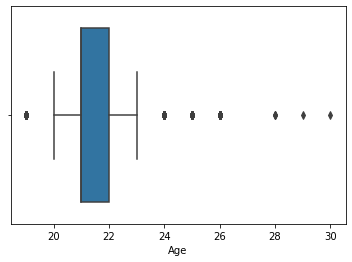

In [24]:
sns.boxplot(df['Age'])

In [25]:
q1=df['Age'].quantile(0.25)

In [26]:
q3=df['Age'].quantile(0.75)

In [27]:
IQR=q3-q1

In [28]:
lower=q1-1.5*IQR

In [29]:
upper=q3+1.5*IQR

In [30]:
df=df[(df['Age']>lower) & (df['Age']<upper)]

In [31]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

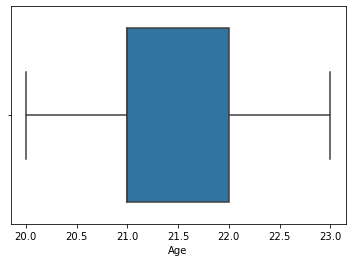

In [32]:
sns.boxplot(df['Age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CGPA'>

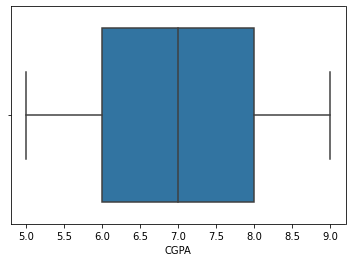

In [33]:
sns.boxplot(df['CGPA'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

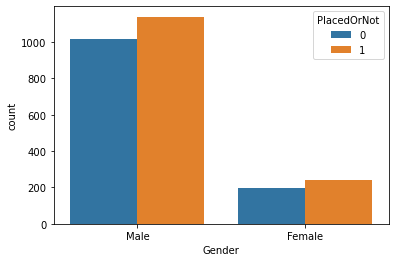

In [34]:
sns.countplot(x=df['Gender'],hue=df['PlacedOrNot'])

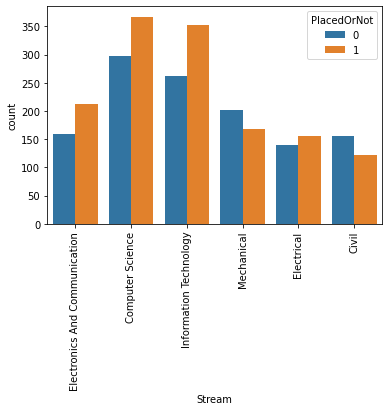

In [35]:
sns.countplot(x=df['Stream'],hue=df['PlacedOrNot'])
plt.xticks(rotation=90)
plt.show()

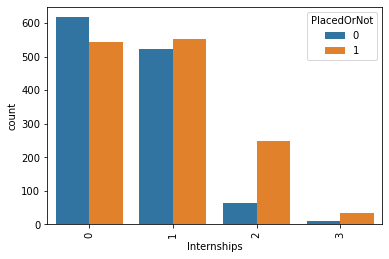

In [36]:
sns.countplot(x=df['Internships'],hue=df['PlacedOrNot'])
plt.xticks(rotation=90)
plt.show()

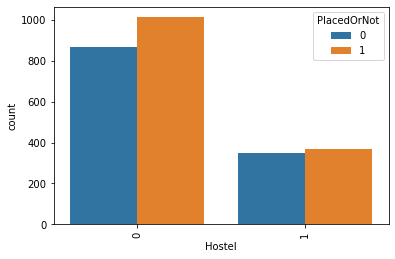

In [37]:
sns.countplot(x=df['Hostel'],hue=df['PlacedOrNot'])
plt.xticks(rotation=90)
plt.show()

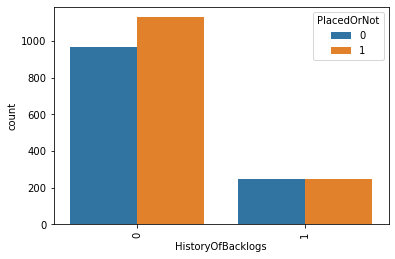

In [38]:
sns.countplot(x=df['HistoryOfBacklogs'],hue=df['PlacedOrNot'])
plt.xticks(rotation=90)
plt.show()

In [39]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


<AxesSubplot:xlabel='Gender', ylabel='CGPA'>

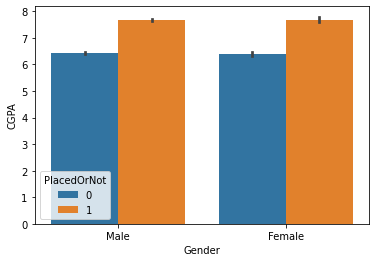

In [40]:
sns.barplot(x=df['Gender'],y=df['CGPA'],hue=df['PlacedOrNot'])

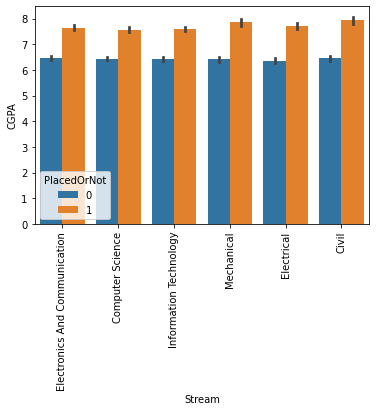

In [41]:
sns.barplot(x=df['Stream'],y=df['CGPA'],hue=df['PlacedOrNot'])
plt.xticks(rotation=90)
plt.show()

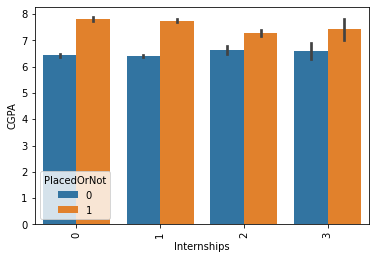

In [42]:
sns.barplot(x=df['Internships'],y=df['CGPA'],hue=df['PlacedOrNot'])
plt.xticks(rotation=90)
plt.show()

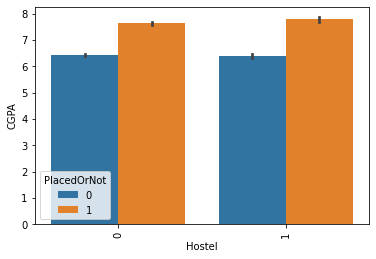

In [43]:
sns.barplot(x=df['Hostel'],y=df['CGPA'],hue=df['PlacedOrNot'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Age'>

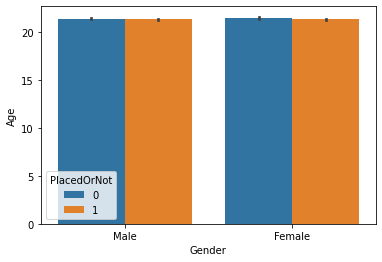

In [44]:
sns.barplot(x=df['Gender'],y=df['Age'],hue=df['PlacedOrNot'])

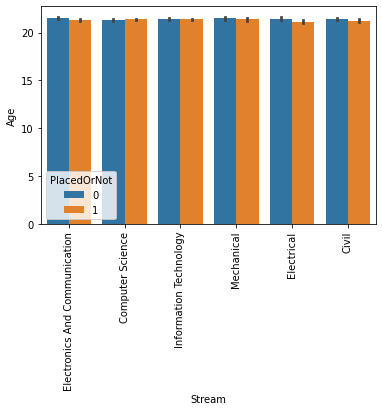

In [45]:
sns.barplot(x=df['Stream'],y=df['Age'],hue=df['PlacedOrNot'])
plt.xticks(rotation=90)
plt.show()

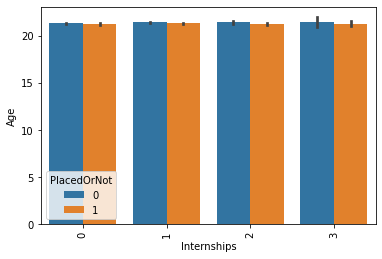

In [46]:
sns.barplot(x=df['Internships'],y=df['Age'],hue=df['PlacedOrNot'])
plt.xticks(rotation=90)
plt.show()

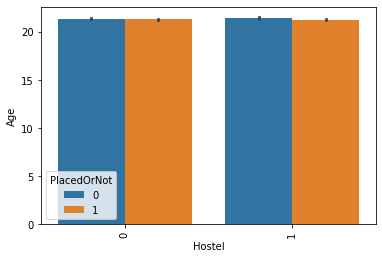

In [47]:
sns.barplot(x=df['Hostel'],y=df['Age'],hue=df['PlacedOrNot'])
plt.xticks(rotation=90)
plt.show()

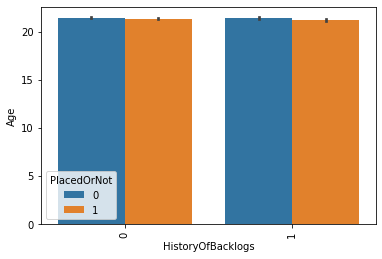

In [48]:
sns.barplot(x=df['HistoryOfBacklogs'],y=df['Age'],hue=df['PlacedOrNot'])
plt.xticks(rotation=90)
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

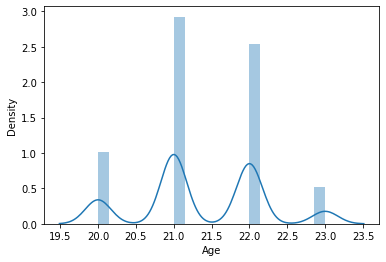

In [49]:
sns.distplot(df['Age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CGPA', ylabel='Density'>

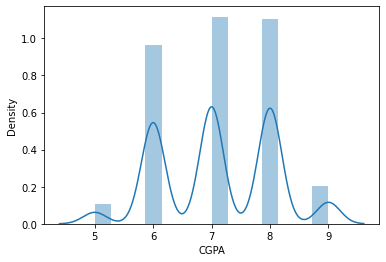

In [50]:
sns.distplot(df['CGPA'])

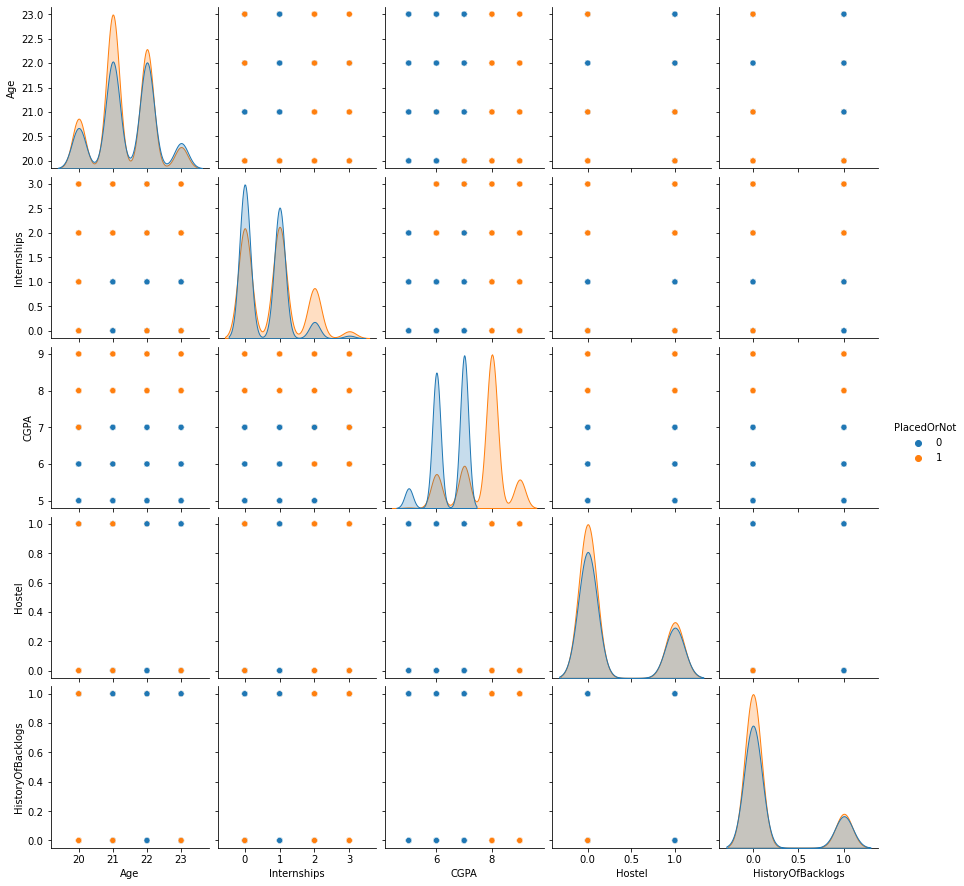

In [51]:
sns.pairplot(data=df,hue="PlacedOrNot")

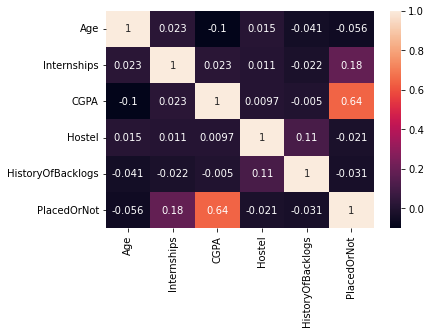

In [52]:
sns.heatmap(df.corr(),annot=True)
plt.xticks(rotation=90)
plt.show()

In [53]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [54]:
le=LabelEncoder()


In [55]:
df['Gender']=le.fit_transform(df['Gender'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_14664\536352534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender']=le.fit_transform(df['Gender'])


In [56]:
df['Stream']=le.fit_transform(df['Stream'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_14664\20320982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stream']=le.fit_transform(df['Stream'])


In [57]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,1,4,0,7,0,0,0
2962,23,1,5,1,7,1,0,0
2963,22,1,4,1,7,0,0,0
2964,22,1,1,1,7,0,0,0


In [58]:
X=df.drop('PlacedOrNot',axis=1)

In [59]:
y=df['PlacedOrNot']

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PlacedOrNot', ylabel='count'>

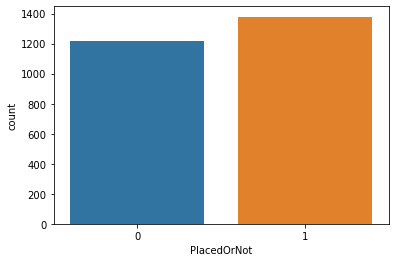

In [60]:
sns.countplot(df['PlacedOrNot'])

In [61]:
sc=StandardScaler()


In [62]:
X=sc.fit_transform(X)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [64]:
X_train.shape

(2076, 7)

In [65]:
y_train.shape

(2076,)

In [66]:
X_test.shape

(519, 7)

In [67]:
y_test.shape

(519,)

# RandomForestClassifier

In [68]:
rfc=RandomForestClassifier()


In [69]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [70]:
y_pred=rfc.predict(X_train)

In [71]:
accuracy_score(y_train,y_pred)

0.9291907514450867

In [72]:
y_pred=rfc.predict(X_test)

In [73]:
accuracy_score(y_test,y_pred)

0.8574181117533719

In [74]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

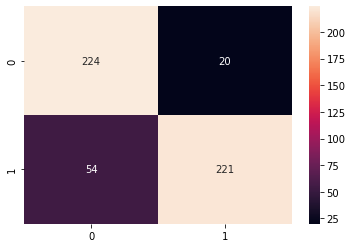

In [75]:
sns.heatmap(data=cm,annot=True,fmt='d')

In [76]:
KF=KFold(5)

In [77]:
scores=cross_val_score(rfc,X_test,y_test,cv=KF)

In [78]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.7884615384615384
1 0.8365384615384616
2 0.8365384615384616
3 0.7692307692307693
4 0.8058252427184466


In [79]:
scores.mean()

0.8073188946975355

# LogisticRegression

In [80]:
lr=LogisticRegression()


In [81]:
lr.fit(X_train,y_train)

LogisticRegression()

In [82]:
y_pred=lr.predict(X_train)

In [83]:
accuracy_score(y_train,y_pred)

0.8063583815028902

In [84]:
y_pred=lr.predict(X_test)

In [85]:
accuracy_score(y_test,y_pred)

0.7552986512524085

In [86]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

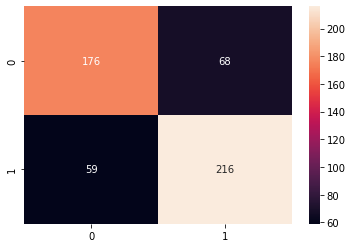

In [87]:
sns.heatmap(data=cm,annot=True,fmt='d')

In [88]:
KF=KFold(5)

In [89]:
scores=cross_val_score(lr,X_test,y_test,cv=KF)

In [90]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.7980769230769231
1 0.7211538461538461
2 0.7307692307692307
3 0.7115384615384616
4 0.7669902912621359


In [91]:
scores.mean()

0.7457057505601196

# KNeighborsClassifier

In [92]:
knc=KNeighborsClassifier()


In [93]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [94]:
y_pred=knc.predict(X_train)

In [95]:
accuracy_score(y_train,y_pred)

0.9017341040462428

In [96]:
y_pred=knc.predict(X_test)

In [97]:
accuracy_score(y_test,y_pred)

0.8323699421965318

In [98]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

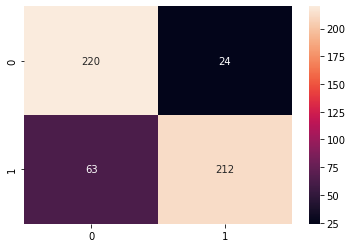

In [99]:
sns.heatmap(data=cm,annot=True,fmt='d')

In [100]:
KF=KFold(5)

In [101]:
scores=cross_val_score(knc,X_test,y_test,cv=KF)

In [102]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.75
1 0.7692307692307693
2 0.7692307692307693
3 0.7596153846153846
4 0.6990291262135923


In [103]:
scores.mean()

0.749421209858103

# XGBClassifier

In [104]:
xgb_i=xgb.XGBClassifier()


In [105]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [106]:
y_pred=xgb_i.predict(X_train)

In [107]:
accuracy_score(y_train,y_pred)

0.9234104046242775

In [108]:
y_pred=xgb_i.predict(X_test)

In [109]:
accuracy_score(y_test,y_pred)

0.8670520231213873

In [110]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

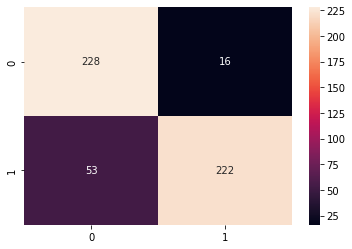

In [111]:
sns.heatmap(data=cm,annot=True,fmt='d')

In [112]:
KF=KFold(5)

In [113]:
scores=cross_val_score(xgb_i,X_test,y_test,cv=KF)

In [114]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.8076923076923077
1 0.8076923076923077
2 0.8076923076923077
3 0.8076923076923077
4 0.8349514563106796


In [115]:
scores.mean()

0.813144137415982

# DecisionTreeClassifier

In [116]:
dtc=DecisionTreeClassifier()


In [117]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [118]:
y_pred=dtc.predict(X_train)

In [119]:
accuracy_score(y_train,y_pred)

0.9291907514450867

In [120]:
y_pred=dtc.predict(X_test)

In [121]:
accuracy_score(y_test,y_pred)

0.8651252408477842

In [122]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

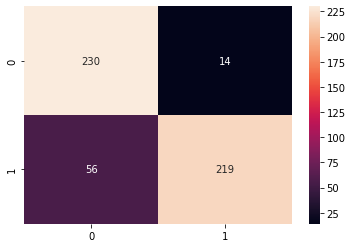

In [123]:
sns.heatmap(data=cm,annot=True,fmt='d')

In [124]:
KF=KFold(5)

In [125]:
scores=cross_val_score(dtc,X_test,y_test,cv=KF)

In [126]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.8173076923076923
1 0.7788461538461539
2 0.8365384615384616
3 0.8173076923076923
4 0.8155339805825242


In [127]:
scores.mean()

0.8131067961165048

# GaussianNB

In [128]:
model=GaussianNB()


In [129]:
model.fit(X_train,y_train)

GaussianNB()

In [130]:
y_pred=model.predict(X_train)

In [131]:
accuracy_score(y_train,y_pred)

0.8347784200385356

In [132]:
y_pred=model.predict(X_test)

In [133]:
accuracy_score(y_test,y_pred)

0.7861271676300579

In [134]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

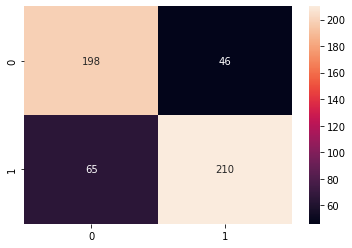

In [135]:
sns.heatmap(data=cm,annot=True,fmt='d')

In [136]:
KF=KFold(5)

In [137]:
scores=cross_val_score(model,X_test,y_test,cv=KF)

In [138]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.8365384615384616
1 0.7307692307692307
2 0.8269230769230769
3 0.7307692307692307
4 0.7961165048543689


In [139]:
scores.mean()

0.7842233009708738

In [140]:
confusion_matrix(y_test,y_pred)

array([[198,  46],
       [ 65, 210]], dtype=int64)

# ANN

In [141]:
model=keras.Sequential([
    keras.layers.Dense(15,input_shape=(7,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')   
])

In [142]:
model.compile(optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy'])

In [143]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
65/65 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.5617
Epoch 2/10
65/65 [==============================] - 0s 2ms/step - loss: 0.5849 - accuracy: 0.7587
Epoch 3/10
65/65 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.7924
Epoch 4/10
65/65 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.8232
Epoch 5/10
65/65 [==============================] - 0s 1ms/step - loss: 0.3644 - accuracy: 0.8372
Epoch 6/10
65/65 [==============================] - 0s 2ms/step - loss: 0.3456 - accuracy: 0.8454
Epoch 7/10
65/65 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8487
Epoch 8/10
65/65 [==============================] - 0s 1ms/step - loss: 0.3224 - accuracy: 0.8516
Epoch 9/10
65/65 [==============================] - 0s 1ms/step - loss: 0.3147 - accuracy: 0.8579
Epoch 10/10
65/65 [==============================] - 0s 1ms/step - loss: 0.3088 - accuracy: 0.8598


In [144]:
model.evaluate(X_test,y_test)

17/17 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.8092


[0.3840341866016388, 0.8092485666275024]

In [145]:
y_pred=model.predict(X_test)

17/17 [==============================] - 0s 1ms/step


In [146]:
ypred=[]
for i in y_pred:
    if i>0.5:
        ypred.append(1)
    else:
        ypred.append(0)

In [147]:
ypred[:10]

[0, 0, 1, 0, 0, 1, 1, 1, 1, 0]

In [148]:
y_test[:10]

239     0
2492    0
1967    1
2791    1
1881    0
859     1
1154    1
2905    1
862     1
1486    0
Name: PlacedOrNot, dtype: int64

In [149]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=ypred)

<AxesSubplot:>

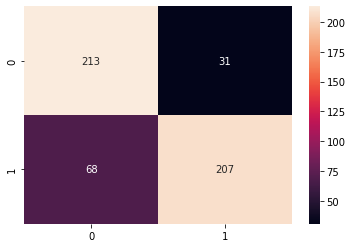

In [150]:
sns.heatmap(data=cm,fmt='d',annot=True)